###Problem Statement:
You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its
competitors. You have to analyse the data of your company and find insights and stop your customers from
churning out to other telecom companies.

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

### Load the Dataset

In [4]:
data = pd.read_csv('/content/customer_churn (1).csv')

In [5]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###A) Data Manipulation:
a. Find the total number of male customers


In [7]:
total_males = data[data['gender'] == 'Male'].shape[0]
print("Total number of male customers:", total_males)

Total number of male customers: 3555


###b. Find the total number of customers whose Internet Service is ‘DSL’

In [8]:
DSL_customers = data[data['InternetService'] == 'DSL'].shape[0]
print("Total number of customers with DSL Internet service:", DSL_customers)

Total number of customers with DSL Internet service: 2421


###c. Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’

In [9]:
New_Customer1 = data[(data['gender'] == 'Female') & (data['SeniorCitizen'] == 1) & (data['PaymentMethod'] == 'Mailed check')]

In [10]:
New_Customer1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,Yes
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,No
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,No
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,No


###d. Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’

In [12]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

New_Customer2 = data[(data['tenure'] < 10) | (data['TotalCharges'] < 500)]

In [13]:
New_Customer2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


### B) Data Visualization:

### a. Build a pie-chart to show the distribution of customers would be churning out

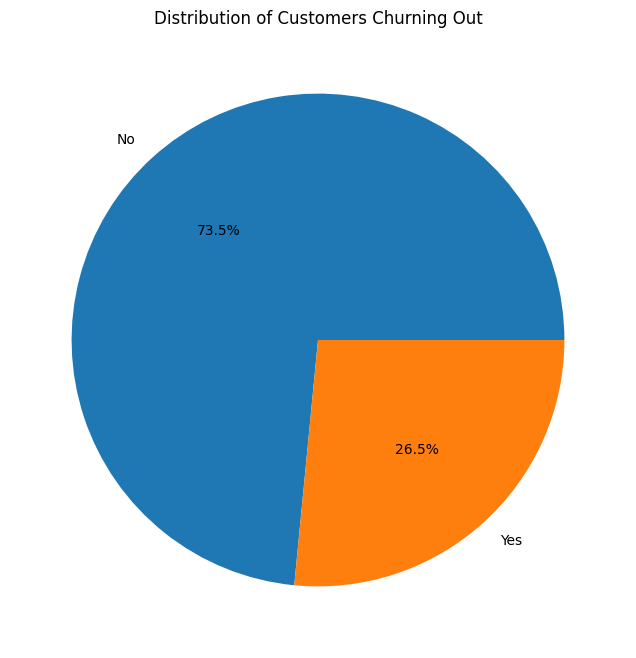

In [14]:
labels = data['Churn'].value_counts().index
sizes = data['Churn'].value_counts().values

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Customers Churning Out')
plt.show()

### b. Build a bar-plot to show the distribution of ‘Internet Service’

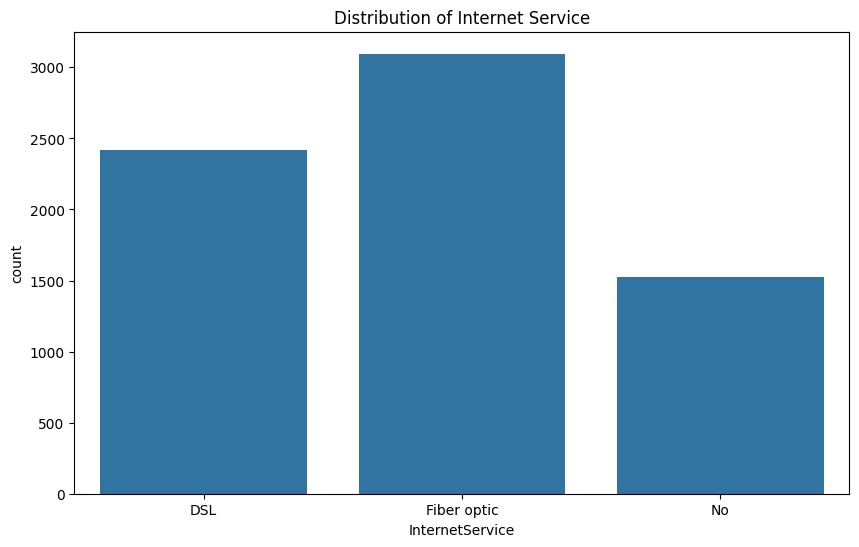

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', data=data)
plt.title('Distribution of Internet Service')
plt.show()

###C) Model Building:

### a. Build a sequential model using Keras, to find out if the customerwouldchurn or not, using ‘tenure’ as the feature and ‘Churn’ as the dependent/target column:




### i.The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
### ii.This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
### iii.Use ‘Adam’ as the optimization algorithm
### iv.Fit the model on the train set, with number of epochs to be 150
### v.Predict the values on the test set and build a confusion matrix
### vi.Plot the ‘Accuracy vs Epochs’ graph

In [20]:
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])

X = data['tenure']
Y = data['Churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scalar = StandardScaler()
X_train = scalar.fit_transform(X_train.values.reshape(-1, 1))
X_test = scalar.transform(X_test.values.reshape(-1, 1))

In [21]:
model1 = Sequential()
model1.add(Dense(12, input_dim=1, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)

cm1 = confusion_matrix(y_test, y_pred1)
print(cm1)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[929 107]
 [239 134]]


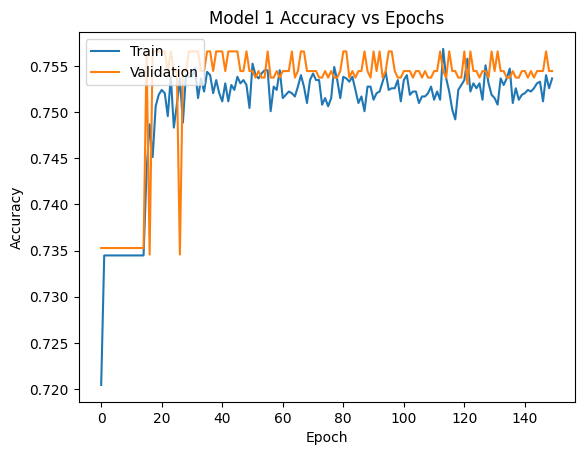

In [23]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model 1 Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### b. Build the 2nd model using same target and feature variables:
### i. Add a drop-out layer after the input layer with drop-out value of 0.3
### ii.Add a drop-out layer after the hidden layer with drop-out value of 0.2
### iii.Predict the values on the test set and build a confusion matrix
### iv.Plot the ‘Accuracy vs Epochs’ graph

In [27]:
model2 = Sequential()
model2.add(Dense(12, input_dim=1, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)

cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[950  86]
 [257 116]]


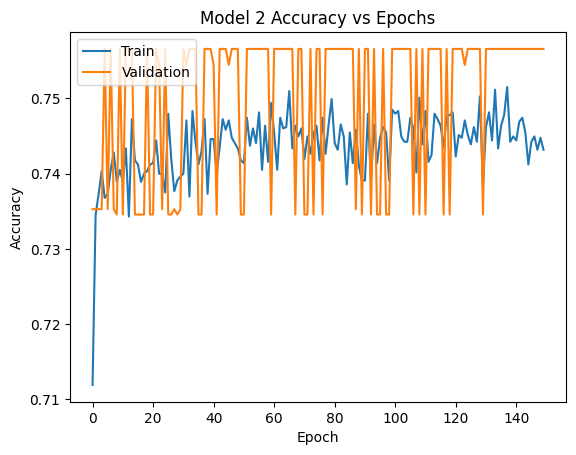

In [30]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model 2 Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:

### i.The visible/input layer should have 12 nodes with ‘Relu’ as activation function.
### ii.This model would have 1 hidden layer with 8 nodes and ‘Relu’ as activation function
### iii.Use ‘Adam’ as the optimization algorithm
### iv.Fit the model on the train set, with number of epochs to be 150
### v.Predict the values on the test set and build a confusion matrix
### vi.Plot the ‘Accuracy vs Epochs’ graph

In [32]:
features = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_multi = data[features]
X_multi = scaler.fit_transform(X_multi)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

model3 = Sequential()
model3.add(Dense(12, input_dim=3, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train_multi, y_train_multi, epochs=150, validation_data=(X_test_multi, y_test_multi), verbose=0)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
y_pred3 = model3.predict(X_test_multi)
y_pred3 = (y_pred3 > 0.5)

cm3 = confusion_matrix(y_test_multi, y_pred3)
print(cm3)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[1036    0]
 [ 373    0]]


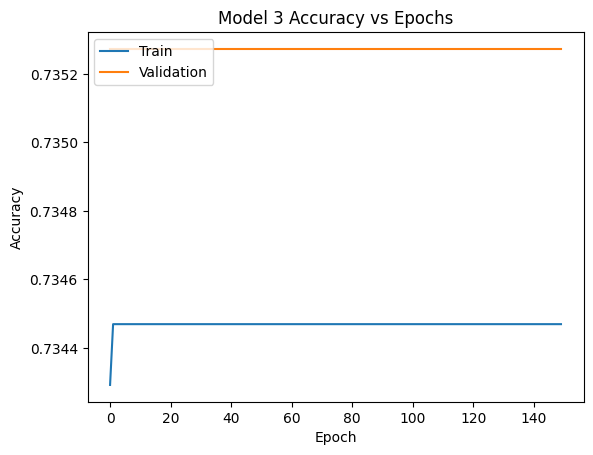

In [37]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model 3 Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()